In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Bước 1: Kết nối tới Google Drive và đọc dữ liệu từ file wifi_dataset_2000.csv

import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Đọc dữ liệu từ file CSV trên Google Drive
file_path = "//content/drive/MyDrive/dataset_thesis/wifi_dataset_realistic.csv"
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản của dữ liệu
print("Kích thước dữ liệu (số dòng, số cột):", df.shape)
print("\nMột vài dòng đầu tiên của dữ liệu:")
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Kích thước dữ liệu (số dòng, số cột): (10000, 9)

Một vài dòng đầu tiên của dữ liệu:
   Clients  Bandwidth_Usage       RSSI        SNR    Latency  Packet_Loss  \
0       20        10.658474 -76.993148   8.281295  12.287573     4.937438   
1       32         5.174615 -78.486605  10.162187  51.676885     5.358350   
2       21         5.156234 -42.442546  27.283502  32.927967     0.966518   
3       38        10.308931 -59.070301  31.560548  47.883760     3.377909   
4       29         0.770395 -80.489854  28.919769  40.444256     7.898232   

   Interference    AP_Load Traffic_Type  
0    -45.711280  42.633897    Streaming  
1    -66.800432  33.117537    Streaming  
2    -84.859276  21.656184         VoIP  
3    -92.142957  78.347873         VoIP  
4    -82.712652   4.468293         Game  


In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost statsmodels


Thông tin DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Clients          10000 non-null  int64  
 1   Bandwidth_Usage  10000 non-null  float64
 2   RSSI             10000 non-null  float64
 3   SNR              10000 non-null  float64
 4   Latency          10000 non-null  float64
 5   Packet_Loss      10000 non-null  float64
 6   Interference     10000 non-null  float64
 7   AP_Load          10000 non-null  float64
 8   Traffic_Type     10000 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 703.3+ KB

Thống kê mô tả các biến số:
            Clients  Bandwidth_Usage          RSSI           SNR  \
count  10000.000000     10000.000000  10000.000000  10000.000000   
mean      25.050600        17.898212    -57.653481     19.764486   
std       14.143177        14.769415     14.497710     10.186098   
m

<Figure size 1500x1000 with 0 Axes>

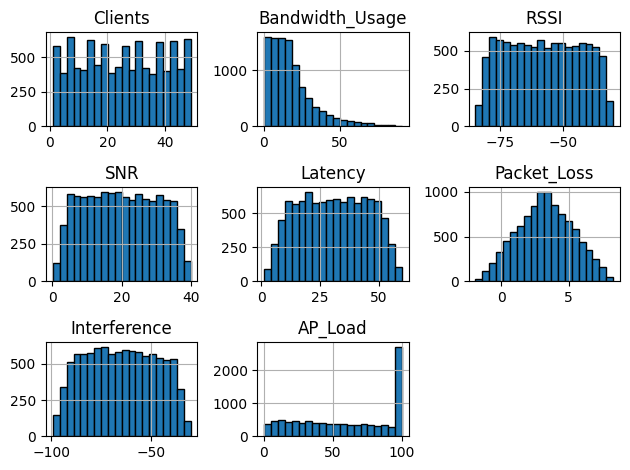

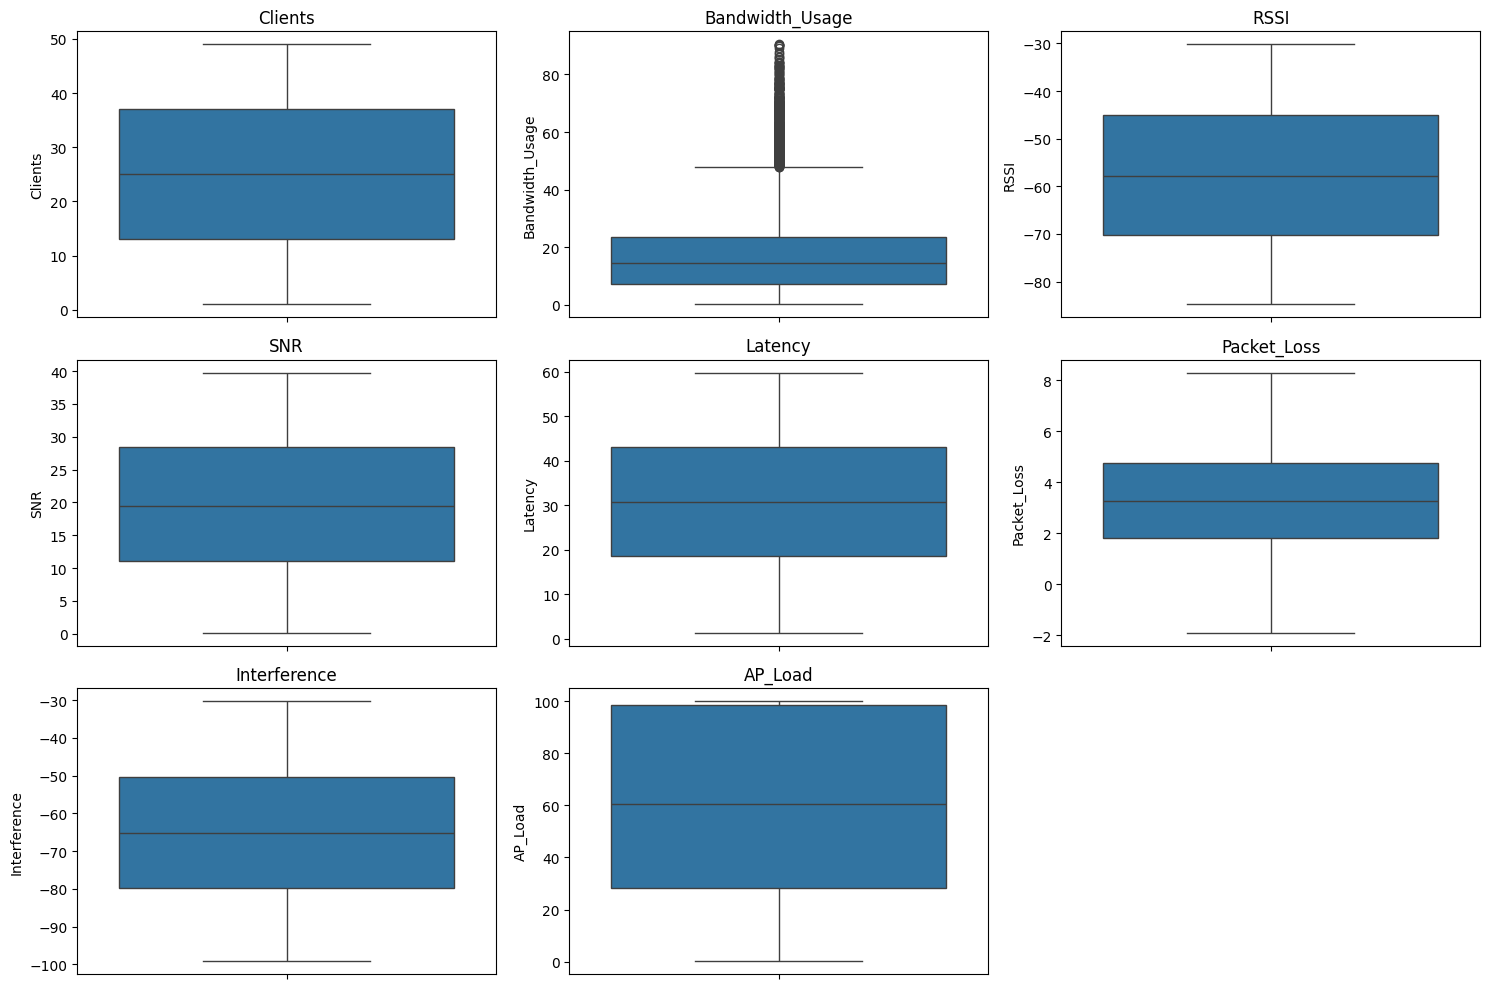

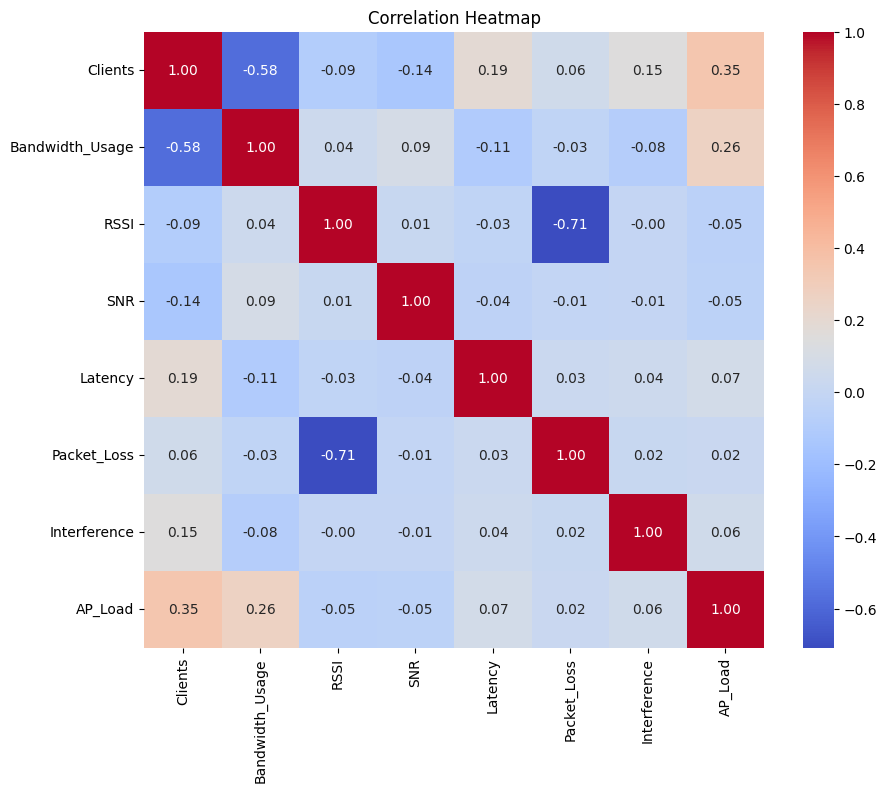

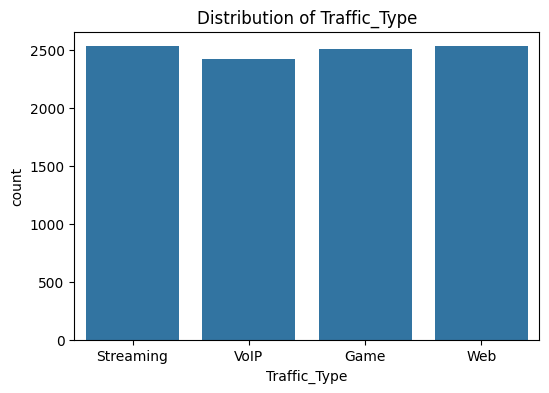

In [4]:
# Bước 2: Khám Phá Dữ Liệu (Exploratory Data Analysis - EDA)

# 1. Kiểm tra thông tin của DataFrame
print("Thông tin DataFrame:")
df.info()

print("\nThống kê mô tả các biến số:")
print(df.describe())

# 2. Kiểm tra giá trị thiếu
print("\nSố giá trị thiếu theo cột:")
print(df.isnull().sum())

# 3. Vẽ biểu đồ phân phối cho các cột số
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
df.hist(bins=20, edgecolor='black', layout=(3, 3))
plt.tight_layout()
plt.show()

# 4. Vẽ boxplot cho các cột số để phát hiện outliers
numeric_cols = ['Clients', 'Bandwidth_Usage', 'RSSI', 'SNR', 'Latency', 'Packet_Loss', 'Interference', 'AP_Load']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 5. Vẽ heatmap để kiểm tra mối tương quan giữa các biến số
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 6. Vẽ biểu đồ phân bố của biến phân loại Traffic_Type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Traffic_Type')
plt.title("Distribution of Traffic_Type")
plt.show()


In [5]:
# Bước 4: Tiền Xử Lý Dữ Liệu

# 1. Xử lý biến phân loại (Traffic_Type) bằng Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Traffic_Type_Encoded'] = label_encoder.fit_transform(df['Traffic_Type'])

# Kiểm tra lại cột mới
print("Các giá trị mã hóa của cột Traffic_Type_Encoded:")
print(df['Traffic_Type_Encoded'].unique())
print("\nBảng mã hóa LabelEncoder:")
for i, cls in enumerate(label_encoder.classes_):
    print(f"{cls} -> {i}")

# 2. (Tuỳ chọn) Kiểm tra và xử lý outliers
# Ví dụ sử dụng IQR
import numpy as np

numeric_cols = ['Clients', 'Bandwidth_Usage', 'RSSI', 'SNR', 'Latency',
                'Packet_Loss', 'Interference', 'AP_Load']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Lọc outliers ngoài [lower_bound, upper_bound]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"\nPhát hiện outliers ở cột {col}, số lượng: {len(outliers)}")
        # Tuỳ theo chiến lược, bạn có thể loại bỏ, hoặc gán bằng ngưỡng:
        # df.loc[df[col] < lower_bound, col] = lower_bound
        # df.loc[df[col] > upper_bound, col] = upper_bound
        # Hoặc loại bỏ hẳn:
        # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# 3. (Tuỳ chọn) Chuẩn hóa dữ liệu
# Nếu cần chuẩn hóa, ví dụ dùng StandardScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Kiểm tra lại DataFrame sau tiền xử lý
print("\nDataFrame sau khi mã hoá cột Traffic_Type và xử lý outliers (nếu có):")
print(df.head())


Các giá trị mã hóa của cột Traffic_Type_Encoded:
[1 2 0 3]

Bảng mã hóa LabelEncoder:
Game -> 0
Streaming -> 1
VoIP -> 2
Web -> 3

Phát hiện outliers ở cột Bandwidth_Usage, số lượng: 520

DataFrame sau khi mã hoá cột Traffic_Type và xử lý outliers (nếu có):
   Clients  Bandwidth_Usage       RSSI        SNR    Latency  Packet_Loss  \
0       20        10.658474 -76.993148   8.281295  12.287573     4.937438   
1       32         5.174615 -78.486605  10.162187  51.676885     5.358350   
2       21         5.156234 -42.442546  27.283502  32.927967     0.966518   
3       38        10.308931 -59.070301  31.560548  47.883760     3.377909   
4       29         0.770395 -80.489854  28.919769  40.444256     7.898232   

   Interference    AP_Load Traffic_Type  Traffic_Type_Encoded  
0    -45.711280  42.633897    Streaming                     1  
1    -66.800432  33.117537    Streaming                     1  
2    -84.859276  21.656184         VoIP                     2  
3    -92.142957  78.347

In [6]:
# Bước 5: Xác định bài toán & Tạo biến mục tiêu

# Giả sử chúng ta định nghĩa "tắc nghẽn" (Congestion) khi Latency >= ngưỡng (75th percentile của Latency)
threshold_latency = df['Latency'].quantile(0.75)
print("Ngưỡng Latency (75th percentile):", threshold_latency)

# Tạo biến mục tiêu 'Congestion': 1 nếu Latency >= threshold, ngược lại 0
df['Congestion'] = (df['Latency'] >= threshold_latency).astype(int)

# Kiểm tra phân bố của biến mục tiêu
print("\nPhân bố của biến mục tiêu 'Congestion':")
print(df['Congestion'].value_counts())


Ngưỡng Latency (75th percentile): 43.09801957973907

Phân bố của biến mục tiêu 'Congestion':
Congestion
0    7500
1    2500
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

# Chọn các đặc trưng và biến mục tiêu
features = ['Clients', 'Bandwidth_Usage', 'RSSI', 'SNR', 'Packet_Loss', 'Interference', 'AP_Load', 'Traffic_Type_Encoded']
target = 'Congestion'

X = df[features]
y = df[target]

# Chia dữ liệu: 80% train, 20% test, sử dụng stratify để đảm bảo tỷ lệ lớp của y được duy trì
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Kích thước tập train:", X_train.shape, y_train.shape)
print("Kích thước tập test:", X_test.shape, y_test.shape)


Kích thước tập train: (8000, 8) (8000,)
Kích thước tập test: (2000, 8) (2000,)


Bước 5 xây dựng mô hình

In [8]:
# Import các thư viện cần thiết cho Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu (với dữ liệu cải thiện, chuẩn hóa vẫn giúp mô hình hội tụ tốt hơn)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Dự đoán trên tập test
y_pred_logreg = logreg.predict(X_test_scaled)

# Đánh giá mô hình
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      1500
           1       0.00      0.00      0.00       500

    accuracy                           0.75      2000
   macro avg       0.38      0.50      0.43      2000
weighted avg       0.56      0.75      0.64      2000

Confusion Matrix:
 [[1500    0]
 [ 500    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Import các thư viện cần thiết cho Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_rf = rf.predict(X_test)

# Đánh giá mô hình
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.7465
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85      1500
           1       0.35      0.02      0.03       500

    accuracy                           0.75      2000
   macro avg       0.55      0.50      0.44      2000
weighted avg       0.65      0.75      0.65      2000

Confusion Matrix:
 [[1485   15]
 [ 492    8]]


In [10]:
# Import các thư viện cần thiết cho XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Khởi tạo và huấn luyện mô hình XGBoost
# Lưu ý: Tham số use_label_encoder đã không còn được dùng trong các phiên bản mới của XGBoost.
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_xgb = xgb.predict(X_test)

# Đánh giá mô hình
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost:
Accuracy: 0.729
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84      1500
           1       0.33      0.08      0.13       500

    accuracy                           0.73      2000
   macro avg       0.54      0.51      0.49      2000
weighted avg       0.65      0.73      0.66      2000

Confusion Matrix:
 [[1416   84]
 [ 458   42]]


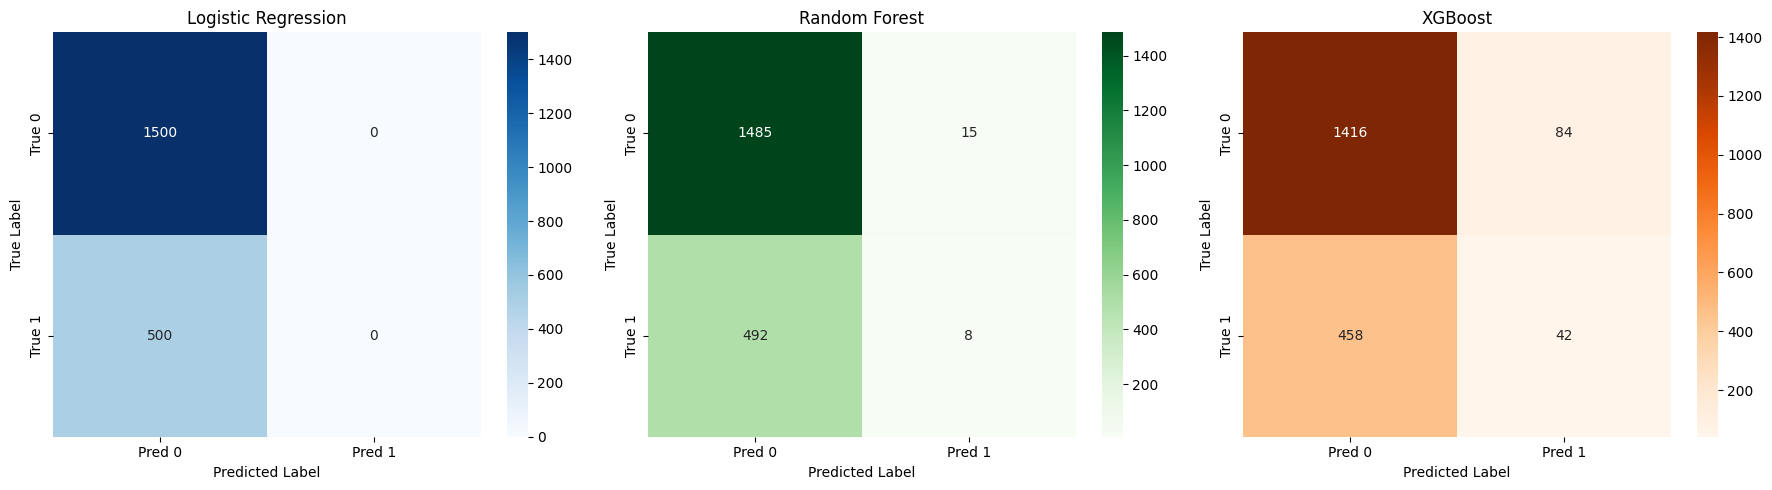

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Giả sử các biến sau đã có:
# y_test: nhãn thật của tập kiểm tra.
# y_pred_logreg: dự đoán của Logistic Regression.
# y_pred_rf: dự đoán của Random Forest.
# y_pred_xgb: dự đoán của XGBoost.

# Tính ma trận nhầm lẫn cho từng mô hình
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Vẽ các ma trận nhầm lẫn trong cùng một figure với 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Ma trận nhầm lẫn của Logistic Regression
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Ma trận nhầm lẫn của Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Ma trận nhầm lẫn của XGBoost
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
axes[2].set_title('XGBoost')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


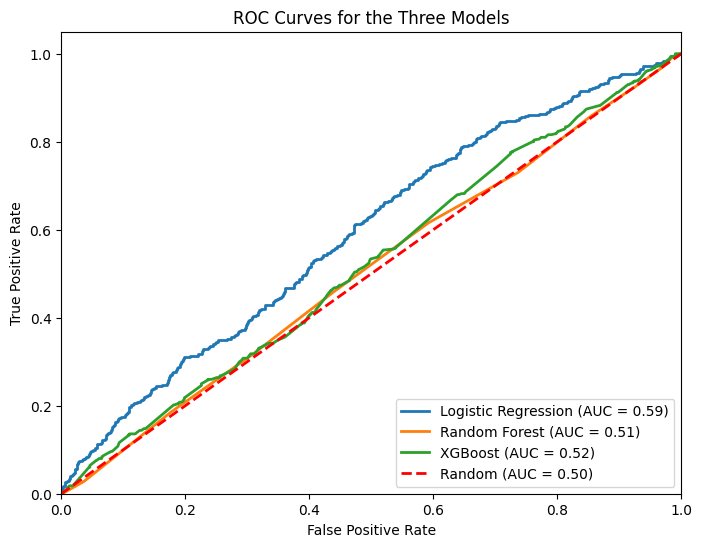

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Lấy xác suất dự đoán (probability) cho lớp 1 từ cả 3 mô hình
#    Ở đây, ta dùng X_test_scaled cho tất cả mô hình để đồng nhất pipeline.
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# 2. Tính FPR, TPR và AUC cho Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# 3. Tính FPR, TPR và AUC cho Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# 4. Tính FPR, TPR và AUC cho XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# 5. Vẽ các đường ROC cho cả ba mô hình trên cùng một biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})', lw=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', lw=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', lw=2)

# Đường chéo biểu thị mô hình ngẫu nhiên
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Three Models')
plt.legend(loc="lower right")
plt.show()


Feature ranking - Random Forest:
1. Interference: 0.1513
2. SNR: 0.1489
3. RSSI: 0.1479
4. Bandwidth_Usage: 0.1472
5. Packet_Loss: 0.1466
6. AP_Load: 0.1116
7. Clients: 0.1033
8. Traffic_Type_Encoded: 0.0431


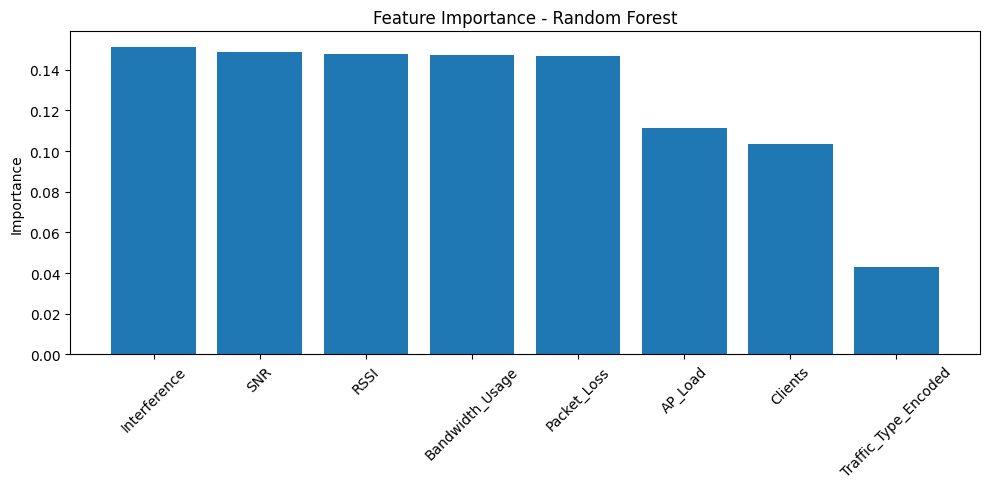

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Lấy tầm quan trọng của các đặc trưng từ mô hình Random Forest
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]  # Sắp xếp theo thứ tự giảm dần

# In ra thứ tự tầm quan trọng
print("Feature ranking - Random Forest:")
for i in range(len(indices_rf)):
    print(f"{i+1}. {X_train.columns[indices_rf[i]]}: {importances_rf[indices_rf[i]]:.4f}")

# Vẽ biểu đồ tầm quan trọng
plt.figure(figsize=(10, 5))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_rf], rotation=45)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


Feature ranking - XGBoost:
1. Clients: 0.1505
2. Interference: 0.1308
3. Packet_Loss: 0.1282
4. SNR: 0.1277
5. RSSI: 0.1247
6. AP_Load: 0.1208
7. Bandwidth_Usage: 0.1140
8. Traffic_Type_Encoded: 0.1032


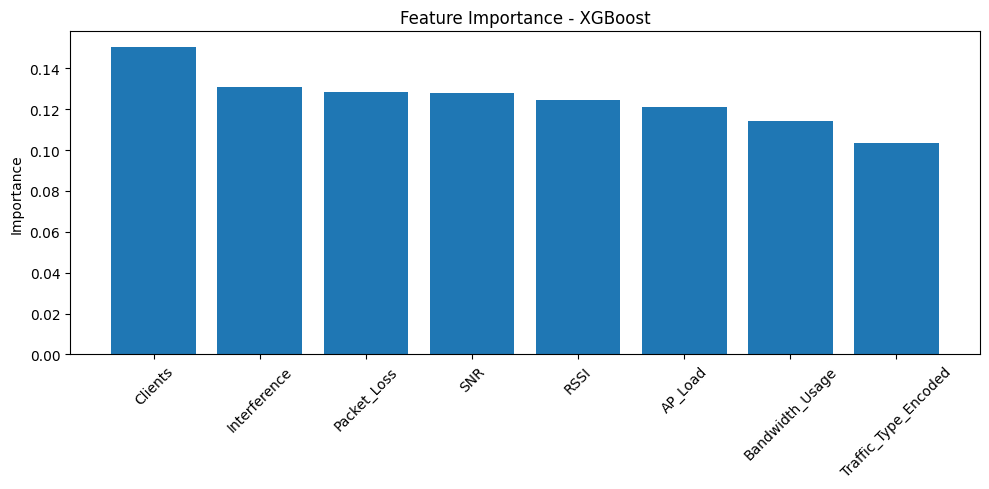

In [14]:
# Lấy tầm quan trọng của các đặc trưng từ mô hình XGBoost
importances_xgb = xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

# In ra thứ tự tầm quan trọng
print("Feature ranking - XGBoost:")
for i in range(len(indices_xgb)):
    print(f"{i+1}. {X_train.columns[indices_xgb[i]]}: {importances_xgb[indices_xgb[i]]:.4f}")

# Vẽ biểu đồ tầm quan trọng
plt.figure(figsize=(10, 5))
plt.title("Feature Importance - XGBoost")
plt.bar(range(X_train.shape[1]), importances_xgb[indices_xgb], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_xgb], rotation=45)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


Feature Coefficients - Logistic Regression:
1. Clients: 0.1771
2. AP_Load: 0.0795
3. Bandwidth_Usage: -0.0680
4. Traffic_Type_Encoded: 0.0387
5. Packet_Loss: 0.0270
6. RSSI: -0.0143
7. Interference: 0.0106
8. SNR: -0.0078


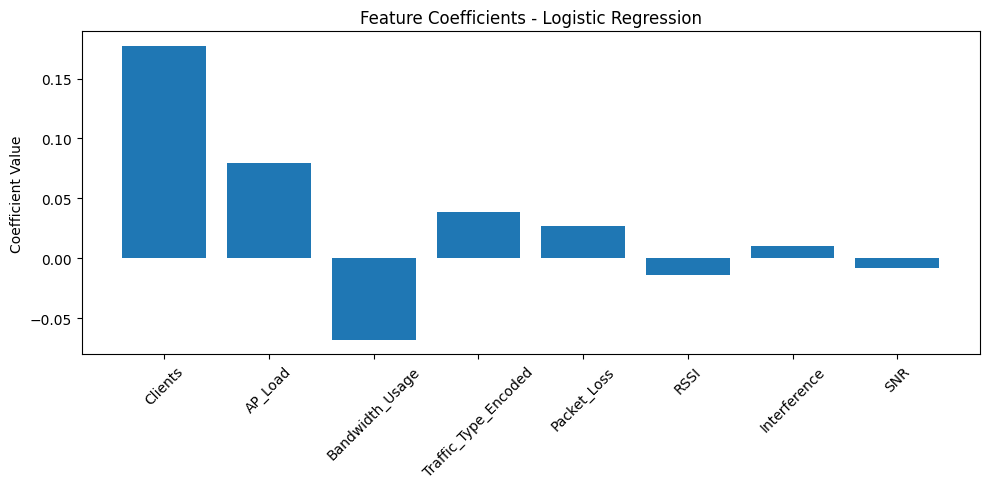

In [15]:
# Lấy hệ số của Logistic Regression (với dữ liệu đã chuẩn hóa)
coefs = logreg.coef_[0]
indices_lr = np.argsort(np.abs(coefs))[::-1]

# In ra thứ tự ảnh hưởng của các đặc trưng theo hệ số
print("Feature Coefficients - Logistic Regression:")
for i in range(len(indices_lr)):
    print(f"{i+1}. {X_train.columns[indices_lr[i]]}: {coefs[indices_lr[i]]:.4f}")

# Vẽ biểu đồ hệ số
plt.figure(figsize=(10, 5))
plt.title("Feature Coefficients - Logistic Regression")
plt.bar(range(X_train.shape[1]), coefs[indices_lr], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_lr], rotation=45)
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()


In [16]:
import joblib

# Lưu mô hình đã huấn luyện (ví dụ: xgb) và scaler (scaler)
joblib.dump(xgb, 'xgboost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Mô hình và Scaler đã được lưu thành công.")


Mô hình và Scaler đã được lưu thành công.


In [17]:
!pip install pyngrok

In [18]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00
